In [1]:
%pip install wordcloud
%pip install konlpy


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 213.6 kB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 3.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 7.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  DEPRECATION: lxml is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for lxml ... done

[notice] A new release of pip available: 22.3.1 -> 23.0

In [3]:
# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

print('hello')

hello


In [6]:
national_anthem = """
동해물과 백두산이 마르고 닳도록
하느님이 보우하사 우리나라 만세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
남산 위에 저 소나무 철갑을 두른 듯
바람 서리 불변함은 우리 기상일세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
가을 하늘 공활한데 높고 구름 없이
밝은 달은 우리 가슴 일편단심일세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
이 기상과 이 맘으로 충성을 다하여
괴로우나 즐거우나 나라 사랑하세
무궁화 삼천리 화려 강산
대한 사람 대한으로 길이 보전하세
"""


Alone = """
우리 사인 더 이상 없어 다음은
숨이 차 턱 밑까지 like I'm divin'
홀로 남아도 okay, it's okay
나 홀로 남아도 okay, it's okay
Yeah, hm-hm
삥 돌려 말하기는 싫어
이런 가사도 난 쓰기 싫어
더는 못해 너가 원하는 거
끝이 왔는데 왜 괴롭혀 수시로
넌 말해 내가 이제 못 미덥대
몇 번을 되물어 우린 어떡해 뭘 어떡해
Don't bother me 이제는 love ain't a thing
맞추는 것도 내겐 힘겹게
다 괜찮아져 you gon hold that
왜 붙잡아 손을 못 놓게
우리 사인 답이 없는데 자꾸만 문제를 찾으려고 헤매
Tired of love songs
아무 의미 없어
Tired of love songs
듣기 싫어 꺼줘
우리 사인 더 이상 없어 다음은
숨이 차 턱 밑까지 like I'm divin'
홀로 남아도 okay, it's okay
나 홀로 남아도 okay, it's okay
You keep on drivin' me crazy (drivin' me crazy)
You keep on drivin' me crazy (drivin' me crazy)
Why you make me say
Hm-hm-hm, hm-hm, hm
You make me say
Hm-hm-hm, hm-hm, hm
우리 사인 없어 이 다음에
왜 다그치려고 하는데
아무도 나를 못 판단해
괜찮아 I don't need nobody
하나도 안 남아 미련
나한테만 신경 쓰기도 버거워
쓸데없이 여지를 주기 싫어
더 뒤로 밀어 you know we're done
Why you trippin' on me
시간은 가 쉴 틈 없이
내 생각 고칠 리 없으니
나도 내가 못 미덥지
이대로 걍 내비둬
Tired of love songs
다 의미 없어
Tired of love songs
듣기 싫어 꺼줘
더는 싫어 너의 구속
나 들었어 이미 두 손
오해 no way ya
똑같아 평범한 대화야
좋은 것도 한번 볼 때만
이젠 시간 낭비 no waste ya –
Wake up in your bed
Same old thing
Ari said Ok next
우리 사인 더 이상 없어 다음은
숨이 차 턱 밑까지 like I'm divin'
홀로 남아도 okay, it's okay
나 홀로 남아도 okay, it's okay
You keep on drivin' me crazy
You keep on drivin' me crazy
Why you make me say
Hm-hm-hm, hm-hm, hm
You make me say
Hm-hm-hm, hm-hm, hm
Hm-hm-hm, hm, hm-hm
You make me say
You make me say
"""

In [17]:
hannanum = Hannanum()

nouns = hannanum.nouns(Alone)



nouns[:10]

['우리', '사', '이상', '다음', '숨', '턱', '밑', '나', '말하기', '가사']

In [18]:
counter = Counter(nouns)
counter

Counter({'우리': 5,
         '사': 5,
         '이상': 3,
         '다음': 4,
         '숨': 3,
         '턱': 3,
         '밑': 3,
         '나': 9,
         '말하기': 1,
         '가사': 1,
         '너': 2,
         '것': 3,
         '끝': 1,
         '말': 1,
         '미덥대': 1,
         '몇': 1,
         '번': 1,
         '우': 1,
         '뭐': 1,
         '내겐': 1,
         '손': 2,
         '답': 1,
         '문제': 1,
         '의미': 2,
         '아무': 1,
         '판단해': 1,
         '하나': 1,
         '미련': 1,
         '신경': 1,
         '버거워': 1,
         '여지': 1,
         '뒤': 1,
         '시간': 2,
         '내': 1,
         '생각': 1,
         '리': 1,
         '이대': 1,
         '걍': 1,
         '내비둬': 1,
         '구속': 1,
         '두': 1,
         '오해': 1,
         '평범': 1,
         '대화': 1,
         '한번': 1,
         '때': 1,
         '이젠': 1,
         '낭비': 1,
         '–': 1})

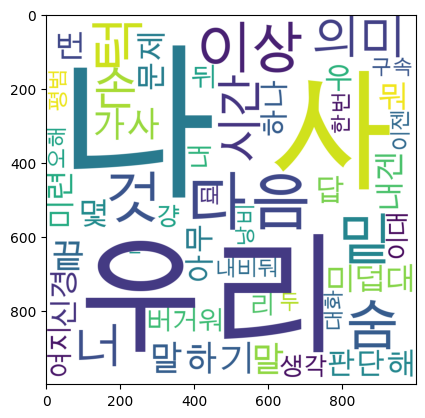

In [19]:
wordcloud = WordCloud(
    font_path = "/Library/Fonts/Arial Unicode.ttf",
    background_color = "white",
    width = 1000,
    height = 1000,
)
img = wordcloud.generate_from_frequencies(counter)

plt.imshow(img)#imageshow